### Документация:
* OpenCV: https://docs.opencv.org/

OpenCV (англ. Open Source Computer Vision Library) это библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом. Позволяет производить обработку изображений с применением фильтров, что упрощает подготовку датасетов перед обучением модели.

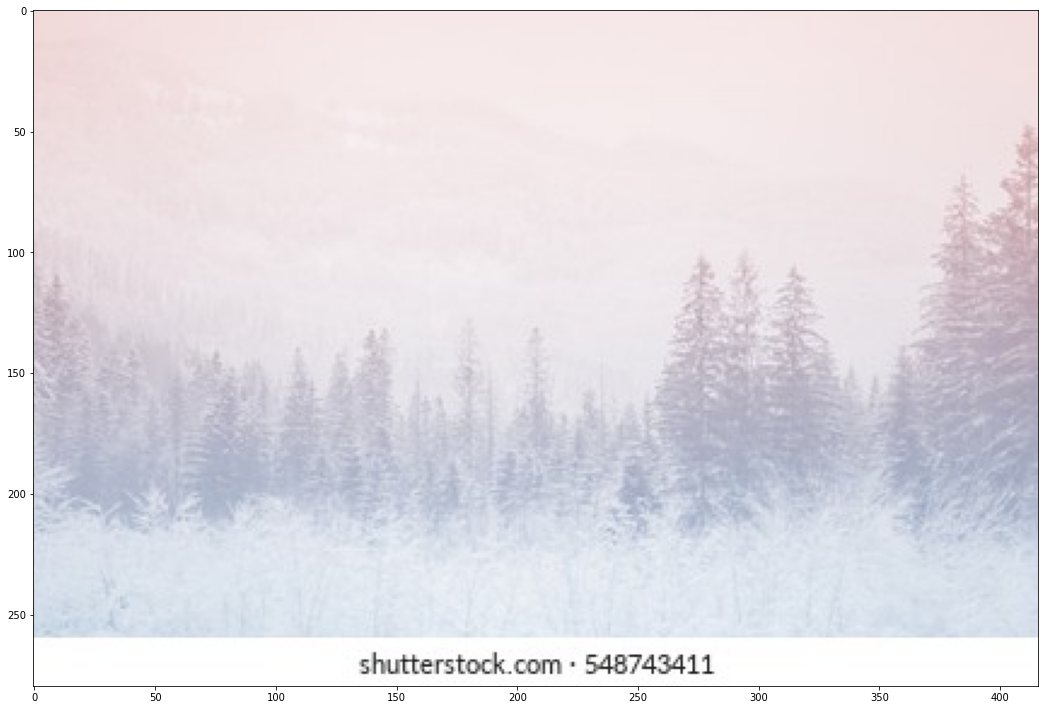

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("lowcontrast.jpg")
plt.figure(figsize=(18, 16))
plt.imshow(im)

In [3]:
import cv2 as cv
import sys
img = cv.imread("lowcontrast.jpg", cv.IMREAD_GRAYSCALE)
if img is None:
    sys.exit("Could not read the image.")
cv.imshow("Display window", img)
k = cv.waitKey(0)
if k == ord("s"):
    cv.imwrite("city.png", img)
cv.destroyAllWindows()

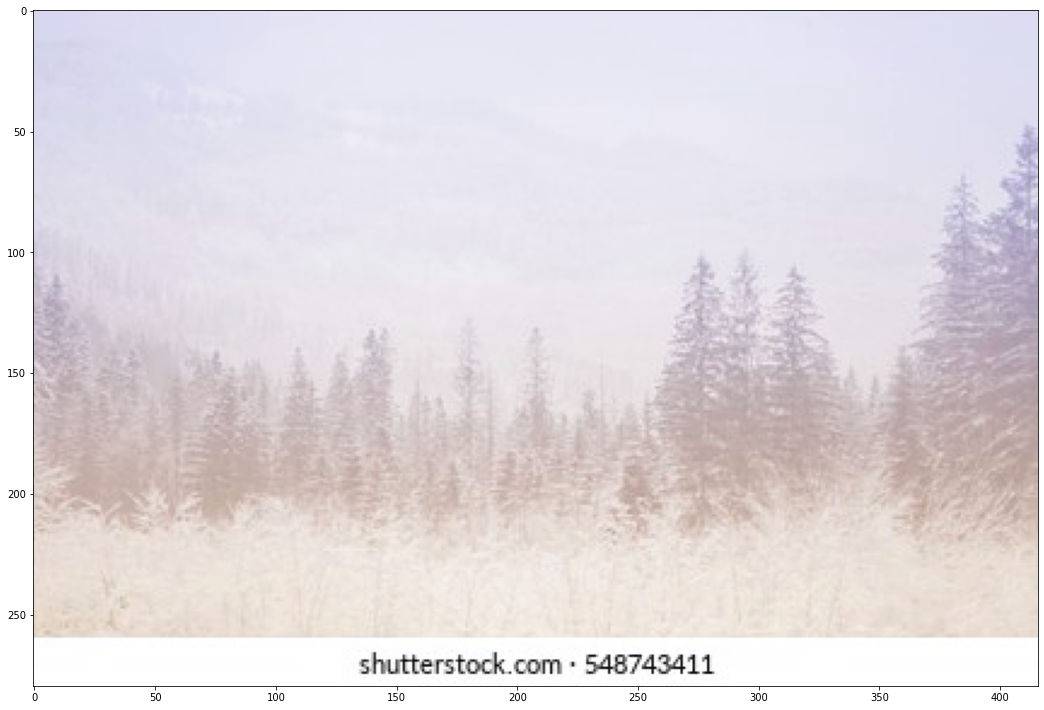

In [4]:
"""
Нормализация значений пикселей от 0 до 255
"""
img = cv.imread('lowcontrast.jpg')
cv.normalize(img, img, 0, 255, cv.NORM_MINMAX)
plt.figure(figsize=(18, 16))
plt.imshow(img)
plt.show()

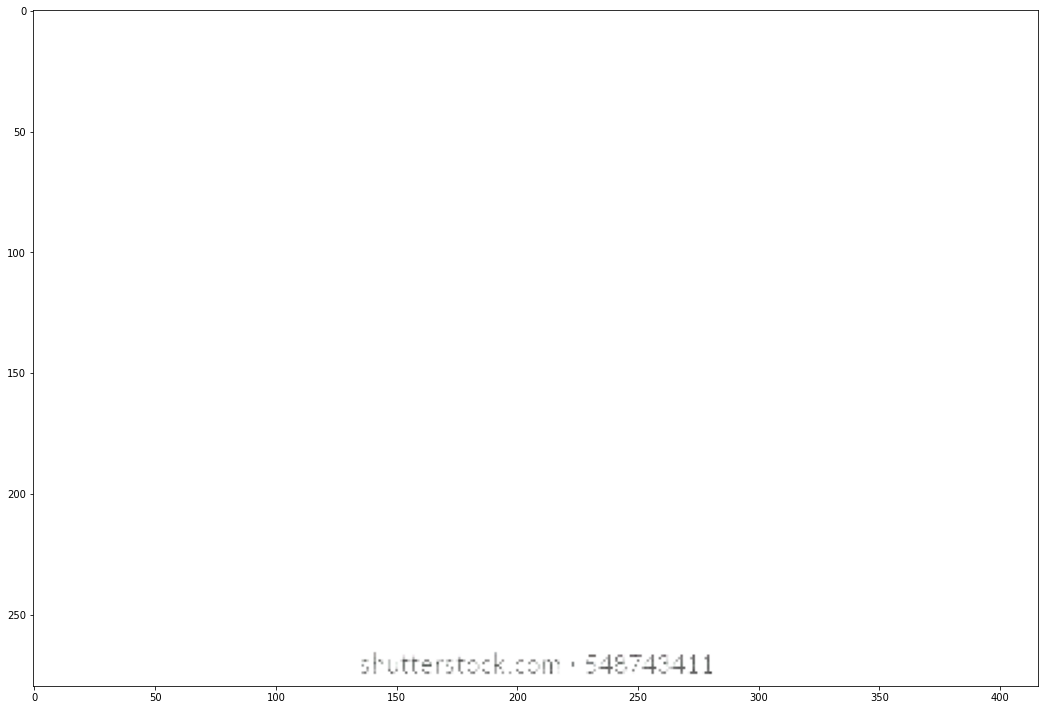

In [5]:
image = cv.imread('lowcontrast.jpg')

alpha = 2.0 # Контроль контраста (1.0-3.0)
beta = 20 # Контроль яркости (0-100)

adjusted = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

plt.figure(figsize=(18, 16))
plt.imshow(adjusted)
plt.show()

## Преобразование из одного цветового пространства в другое

In [6]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

Данный блок можно запустить только при наличии подключенной веб-камеры.

In [8]:
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Берем каждый кадр
    _, frame = cap.read()
    # Конвертируем BGR в HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # Задаем границы зеленого цвета в HSV
    lower_green = np.array([40,40,40])
    upper_green = np.array([70,255,255])
    # Выставляем порог зеленого цвета
    mask = cv.inRange(hsv, lower_green, upper_green)
    # Bitwise-AND (побитовое И) позволяет скомбинировать наш кадр и маску
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

Здесь же мы берем изображение для анализа.

In [9]:
import numpy as np
image = cv.imread('green.jpg')
# Конвертируем BGR в HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
#Задаем границы зеленого цвета в HSV
lower_green = np.array([40,40,40])
upper_green = np.array([70,255,255])
# Выставляем порог зеленого цвета
mask = cv.inRange(hsv, lower_green, upper_green)
# Bitwise-AND (побитовое И) позволяет скомбинировать наш кадр и маску
res = cv.bitwise_and(image,image, mask= mask)
cv.imshow('frame',image)
cv.imshow('mask',mask)
cv.imshow('res',res)
k = cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
red = np.uint8 ([[[0,0,255]]])
hsv_red = cv.cvtColor (red, cv.COLOR_BGR2HSV)
print(hsv_red)

[[[  0 255 255]]]
